# Procesamiento de datos con Python
## Proyecto final

Objetivos
- Obtener datos de una fuente remota
- Crear un proceso de ETL (Extracción, Transformación y Carga)
- Utilizar funciones de Python Standard Library
- Crear funciones de análisis con `filter` & `map`
- Utilizar `Jupyter Notebook`
- Entornos virtuales de Python3
- Utilizar Pandas & Matploitlib
- Usar github

Vivimos en epocas dificiles, COVID19 ha cambiado la manera de ver las cosas
en diferentes aspectos, las redes sociales como Twitter han capturado muchos
de los mensajes publicados por las personas alrededor del mundo.
El proyecto que trabajaras será analizar las publicaciones de usuarios de
twitter relacionadas al tema del momento.

In [86]:
# Obtención de información

import csv
import pandas as pd
import requests
import io
from datetime import datetime
import matplotlib.pyplot as plt

# CONSTANTS
FILENAME = 'http://galileoguzman.com/data/covid19_tweets.csv'
s=requests.get(FILENAME).content
dfcovid = pd.read_csv(io.StringIO(s.decode()))


## Limpieza de dataframe

In [87]:
dfcovid.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [88]:
dfcovid.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [89]:
casting = {
    'user_name': 'string',
    'user_location': 'string',
    'user_description': 'string',
    'user_created': 'datetime64[ns]',
    'date': 'datetime64[ns]',
    'text': 'string',
    'hashtags': 'string',
    'source': 'string',
}
df = dfcovid.astype(casting)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,<NA>,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,<NA>,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [90]:
df.dtypes

user_name                   string
user_location               string
user_description            string
user_created        datetime64[ns]
user_followers               int64
user_friends                 int64
user_favourites              int64
user_verified                 bool
date                datetime64[ns]
text                        string
hashtags                    string
source                      string
is_retweet                    bool
dtype: object

## 5.1.- Días transcurridos
- Ejecuta una función que calcule cuantos días transcurridos han pasado hasta
el día que se ejecute, desde la primera vez que un usuario publicó un tweet
acerca del CoronaVirus.

In [91]:
actual_day = datetime.now().date()
actual_day

datetime.date(2020, 9, 5)

In [92]:
Primer_tweet = df['date'].min().date()
Primer_tweet

datetime.date(2020, 7, 24)

In [93]:
dias_transcurridos = Primer_tweet - actual_day
print(f'Han pasado {abs(dias_transcurridos.days)} desde el primer tweet hasta el dia de hoy')

Han pasado 43 desde el primer tweet hasta el dia de hoy


## 5.2.- Distribución geográfica

- Crea una función que se encargue de mostrar cuántos tweets por ciudad
han sido publicados.
- Crea una función que se encargue de mostrar una gráfica de barras con la
información obtenida de la función anterior.

In [94]:
tweets_por_ciudad = df['user_location'].value_counts().reset_index(name='tweets')
data_plot = tweets_por_ciudad.head(10)
data_plot

,index,tweets
0,India,3493
1,United States,2258
2,"New Delhi, India",1627
3,"Mumbai, India",1296
4,"Washington, DC",1270
5,"London, England",1216
6,United Kingdom,1132
7,London,1053
8,"New York, NY",993
9,Australia,849


Text(0, 0.5, 'Ciudad')

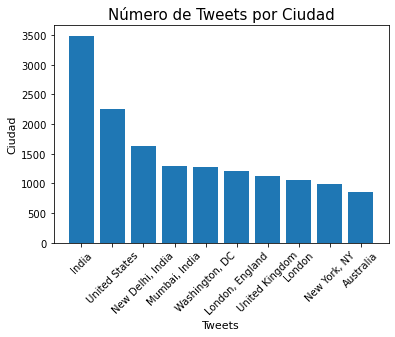

In [95]:
y_values = data_plot['index']
x_values = data_plot['tweets']

plt.bar(y_values, x_values)
plt.xticks(rotation=45)
plt.title("Número de Tweets por Ciudad",fontsize=15)
plt.xlabel("Tweets",fontsize=11,rotation=0)
plt.ylabel("Ciudad",fontsize=11,rotation=90)


## 5.3.- Distribución por usuarios
- Crea una función que muestre el resultado de cuántos usuarios por ciudad
hay con publicación.
- Crea una función que muestre cuales son los usuarios que han publicado
más tweets.

In [97]:
users = df.groupby(['user_name'])['user_location'].value_counts().reset_index(name='Tweets')
users1 = users.sort_values(['Tweets'],ascending=[False])
print('Top 5 usuarios que han publicado mas Tweets:')
users1.head(5)

Top 5 usuarios que han publicado mas Tweets:


,user_name,user_location,Tweets
23279,GlobalPandemic.NET,WORLDWIDE,592
65272,covidnews.ch,Switzerland,402
44188,Open Letters,Text RESIST to 50409,378
8430,Blood Donors India,"Mumbai, India",260
25327,Hindustan Times,India,257


In [37]:
# Traté de filtrar las publicaciones con una funcion para filter 
# pero se me facilitó mas filtrando con loc de pandas.
# def filtro_publicacion(publish):
#     if publish == True:
#         return True

In [98]:
df1 = df.loc[df['user_verified'] == True, :]
df2 = df.loc[df['user_verified'] == False, :]

Porc = round(len(df1)/len(df)*100,0)
print(f'De un total de {len(df)} usuarios, {len(df1)} son usuarios verificados. \nLo cual corresponde a un {Porc}%')


De un total de 166656 usuarios, 21720 son usuarios verificados. 
Lo cual corresponde a un 13.0%


In [104]:
#Filtar unicamente los usuarios verificados
df1 = df.loc[df['user_verified'] == True, :]
df1.head()
#Contar los usuarios con mas tweets
qty_users = df1.groupby('user_name').size().reset_index(name='Qty')
qty_users1 = qty_users.sort_values(['Qty'],ascending=[False])
print('Los usuarios verificados que han publicado mas Tweets son:')
qty_users1.head(5)

Los usuarios verificados que han publicado mas Tweets son:


,user_name,Qty
3836,Open Letters,378
687,Blood Donors India,260
2217,Hindustan Times,257
2271,IANS Tweets,232
153,ANI,221


 ## 5.4.- Distribución por periodos de tiempo
- Crea una función que muestre cuántos tweets han sido publicados por mes, aparte muestrales en una tabla.
- Crea una función que muestre cuántos tweets han sido publicados por semanas, basados en el punto anterior.
- Crea una función que muestre cuales son las horas con más tweets basados en la división del punto anterior, ejemplo:
        - Mañana entre 07-08 horas
        - Tarde entre 15-16 horas
        - Noche entre 21-22 horas

In [114]:
df['time'] = pd.to_datetime(df['date'])

df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['week'] = df['time'].dt.isocalendar().week
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour

df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,time,year,month,day,hour,week
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,<NA>,Twitter for iPhone,False,2020-07-25 12:27:21,2020,7,25,12,30
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,<NA>,Twitter for Android,False,2020-07-25 12:27:17,2020,7,25,12,30
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,2020-07-25 12:27:14,2020,7,25,12,30
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,2020-07-25 12:27:10,2020,7,25,12,30
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,2020-07-25 12:27:08,2020,7,25,12,30


In [118]:
#Tweets por mes
mes_tweets = df.groupby('month').size().reset_index(name='Qty')
mes_tweets1 = mes_tweets.sort_values(['Qty'],ascending=[False])
print('Publicaciones por mes:')
# df['month'].unique()
mes_tweets1

Publicaciones por mes:


,month,Qty
1,8,114720
0,7,51936


In [119]:
#Tweets por semana
week_tweets = df.groupby('week').size().reset_index(name='Qty')
week_tweets1 = week_tweets.sort_values(['Qty'],ascending=[False])
print('Publicaciones por semana:')
week_tweets1

Publicaciones por semana:


,week,Qty
3,33,42391
1,31,42260
2,32,30774
4,34,26555
0,30,24676


In [141]:
#traté de declarar una funcion para emplearlo con map
def day_type(hora):
    if hora >= 7 and hora <= 12:
        return 'mañana'
    elif hora > 12 and hora <=20:
        return 'tarde'
    elif hora > 20:
        return 'noche'
    elif hora > 0 and hora < 7:
        return 'noche'
    
# pero me resulto mejor insertar una nueva columna con el filtro:
df['mañana'] = (df['hour'] >= 7) & (df['hour'] < 12)
df['tarde'] = (df['hour'] >= 12) & (df['hour'] < 20)
df['noche'] = (df['hour'] >= 20) & (df['hour'] < 23) | (df['hour'] >= 0) & (df['hour'] < 7)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,time,year,month,day,hour,week,day_type,mañana,tarde,noche
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,...,2020-07-25 12:27:21,2020,7,25,12,30,True,False,True,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,...,2020-07-25 12:27:17,2020,7,25,12,30,True,False,True,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,...,2020-07-25 12:27:14,2020,7,25,12,30,True,False,True,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,...,2020-07-25 12:27:10,2020,7,25,12,30,True,False,True,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,...,2020-07-25 12:27:08,2020,7,25,12,30,True,False,True,False


In [138]:
#Tweets por la mañana
mañana_tweets = df.groupby('mañana').size().reset_index(name='Qty')
mañana_tweets1 = mañana_tweets.sort_values(['Qty'],ascending=[False])
mañana_tweets2 = mañana_tweets.loc[mañana_tweets['mañana'] == True, :]
mañana_qty = mañana_tweets2.iloc[0]['Qty']
#Tweets por la tarde
tarde_tweets = df.groupby('tarde').size().reset_index(name='Qty')
tarde_tweets1 = tarde_tweets.sort_values(['Qty'],ascending=[False])
tarde_tweets2 = tarde_tweets.loc[tarde_tweets['tarde'] == True, :]
tarde_qty = tarde_tweets2.iloc[0]['Qty']
#Tweets por la noche
noche_tweets = df.groupby('noche').size().reset_index(name='Qty')
noche_tweets1 = noche_tweets.sort_values(['Qty'],ascending=[False])
noche_tweets2 = noche_tweets.loc[noche_tweets['noche'] == True, :]
noche_qty = noche_tweets2.iloc[0]['Qty']

print(f'Cantidad de publicaciones en la mañana (entre las 7am y 12pm): {mañana_qty}')
print(f'Cantidad de publicaciones en la tarde (entre la 1pm y 8pm): {tarde_qty}')
print(f'Cantidad de publicaciones en la noche (entre las 8pm y 6am): {noche_qty}')


Cantidad de publicaciones en la mañana (entre las 7am y 12pm): 48745
Cantidad de publicaciones en la tarde (entre la 1pm y 8pm): 49464
Cantidad de publicaciones en la noche (entre las 8pm y 6am): 68152


## 5.5.- Metadata de tweets
- Crea una función que se encargue de mostrar el total de tweets publicados con base en:
    - Publicados con imágenes
    - Publicados con urls
- Crea una función que se encargue de mostrar las palabras más repetidas por país.

In [142]:
words = df.groupby('text').size().reset_index(name='Qty')
words.head()

,text,Qty
0,! WEAR.A.MASK !\n\n#WearAMask #doitall #evenSw...,1
1,!! Kids Masks !! https://t.co/sf3slukhk5\n\n#k...,1
2,!!! #TWEETofTheDay AND #SCIENCEofTheDay : #Co...,1
3,!!! Get Well Soon !!!\n\nBe Positive about you...,1
4,!Another upgrade awaits me in the app store! I...,1


In [154]:
# pd.DataFrame(dict(
#     text=' '.join(words['text']).split(),
#     count=words['Qty'].repeat(words['text'].str.count(' ') + 1))).groupby('text')['count'].sum()
